# A Predictive Analysis of Heart Disease

## Introduction
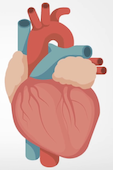

### Background

Heart disease is an umbrella term for several types of heart conditions, but in general is meant to describe a condition that impacts the structure or function of the heart. Heart Disease is a prevalent issue in the United States as it is the leading cause of death for most ethnic groups. Not only is it deadly, but healthcare is expensive making seeking treatment a stressful byproduct of an already consuming diagnosis. Heart disease can be silent and go undiagnosed until someone has symptoms of a heart attack, heart failure or arrhythmia (irregular heart beat). Although there are many controllable factors that can increase the likelihood of someone developing heart disease, there are also factors that individuals cannot control and should be knowledgeable of in order to take preventative measures against developing heart disease.

### Our Question

The question we are looking to answer is ‘Based on an individual's overall health profile/status what would be their risk of developing heart disease?'

### Our Data Set

We are using the "processed.cleveland.data" data set from an external database. It contains measurements of variables correlated to heart disease. Each column represents a different variable correlated to heart disease. Each row is a health profile for each individual containing each of the variables listed below. This will help us determine the diagnosis of each individual, where a 1-4 indicates presence and 0 indicates absence in the num variable.  We are trying to illuminate the variables that play into heart disease and what preventative measures individuals can take to decrease this high death rate. Our goal is to use this data to determine the relationship between an individual's health profile and each variable within it and their subsequent diagnosis.

The data set provides values for the following variables:

age: age in years

sex: sex(1 = male, 0 = female)

cp: chest pain type
-Value 1: typical angina
-Value 2: atypical angina
-Value 3: non-anginal pain
-Value 4: asymptomatic 

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholesterol in mg/dl 

fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

restecg: resting electrocardiographic results
-Value 0: normal
-Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
-Value 1: upsloping
-Value 2: flat
-Value 3: downsloping

ca: number of major vessels (0-3) colored by fluoroscopy

thal: 3 = normal; 6 = fixed defect; 7 = reversible defect 

num: diagnosis of heart disease (angiographic disease status)
-Value 0: < 50% diameter narrowing
-Value 1: > 50% diameter narrowing

Some of which will be used to help us make our predictive classifier. The names have been slightly altered within the classifier in order to make it more comprehensible. Although there are character equivalents to many of the numerical values used in this data set, as shown above, it will remain numerical throughout the report in order to create the classifier. These values will also be slightly altered when scaled. 

Picture source: https://www.youtube.com/watch?v=PnVWIH7PYiQ

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)
library(GGally)
library(ISLR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Here the appropriate libraries are loaded in order to create the visualizations, tables, classifier, etc. used within this report

In [2]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "cleveland_data")

Our file was downloaded from an external source as a comma separated values file and renamed cleveland_data for use within the Jupyter notebook. 

In [3]:
heart_disease_data <- read_delim("cleveland_data", col_names = FALSE, skip=20, delim= ",")
heart_disease_data

Rows: 283 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


#### Table 1.0: Raw Data Set

Here is the visualization of the data table that we just downloaded, the first 20 lines have been skipped to get to the true data set and the column names were set to false because they do not exist in this data set.

In [4]:
names(heart_disease_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_blood_sugar", "resting_electro", "max_hr", "ex_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_data <- heart_disease_data |>
mutate(num = case_when(num == 0 ~ "Healthy" , num == 1 ~ "Sick", num == 2 ~ "Sick", num == 3 ~ "Sick", num == 4 ~ "Sick"))|>
mutate(num = as_factor(num))
heart_disease_data$ca[heart_disease_data$ca == "?"] <- NA
heart_disease_data$thal[heart_disease_data$thal == "?"] <- NA
heart_disease_data

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,Healthy
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,Healthy
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,Sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Sick
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Sick
38,1,3,138,175,0,0,173,0,0.0,1,NA,3.0,Healthy


#### Table 1.1: Data Set with Column Titles 

Here is where we added column names in the order that they appeared. We changed the class variable of "num" from a numerical value to a factor and renamed the number equivalents for each diagnosis in order to prepare for the classification. Any variables with "?" as a value were also changed to "NA" in order to make it easier to remove as we continue to wrangle our data.

In [5]:
heart_disease_data2 <- (na.omit(heart_disease_data))

heart_disease_data3 <- heart_disease_data2|>
mutate(thal = as.numeric(thal))|>
mutate(ca = as.numeric(ca))
heart_disease_data3

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
64,1,1,110,211,0,2,144,1,1.8,2,0,3,Healthy
58,0,1,150,283,1,2,162,0,1.0,1,0,3,Healthy
58,1,2,120,284,0,2,160,0,1.8,2,0,3,Sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,Sick
57,1,4,130,131,0,0,115,1,1.2,2,1,7,Sick
57,0,2,130,236,0,2,174,0,0.0,2,1,3,Sick


#### Table 1.2: Wrangled Data Set

Here we removed all rows containing "NA" as a value so that missing data does not negatively impact our classification. All the variables were also changed to numeric. 

In [6]:
scaled_recipe <- recipe(num ~ ., data = heart_disease_data3)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_data_scaled <- scaled_recipe |>  
    prep() |> 
    bake(heart_disease_data3)
heart_data_scaled

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.034985,0.6981985,-2.248337,-1.1949675,-0.6930261,-0.4040717,1.001856,-0.2187793,1.415489,0.65826822,0.6868786,-0.7358115,-0.8929336,Healthy
0.377437,-1.4270869,-2.248337,1.0317798,0.6730258,2.4658737,1.001856,0.5581676,-0.703919,-0.02561475,-0.9821159,-0.7358115,-0.8929336,Healthy
0.377437,0.6981985,-1.212082,-0.6382806,0.6919987,-0.4040717,1.001856,0.4718402,-0.703919,0.65826822,0.6868786,-0.7358115,-0.8929336,Sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.4733496,0.6981985,0.8604283,0.69776774,-1.0345391,2.4658737,-1.009116,-0.3482704,-0.703919,2.0260342,0.6868786,1.3873112,1.1639696,Sick
0.2678458,0.6981985,0.8604283,-0.08159381,-2.2108616,-0.4040717,-1.009116,-1.4705270,1.415489,0.1453560,0.6868786,0.3257499,1.1639696,Sick
0.2678458,-1.4270869,-1.2120816,-0.08159381,-0.2187026,-0.4040717,1.001856,1.0761322,-0.703919,-0.8804685,0.6868786,0.3257499,-0.8929336,Sick


#### Table 1.3: Scaled and Centered Data Set

Data was scaled and centered, once that was completed it was prepped which is used to save the processed data and baked in order to apply the saved recipe we created earlier to the data set we want. 

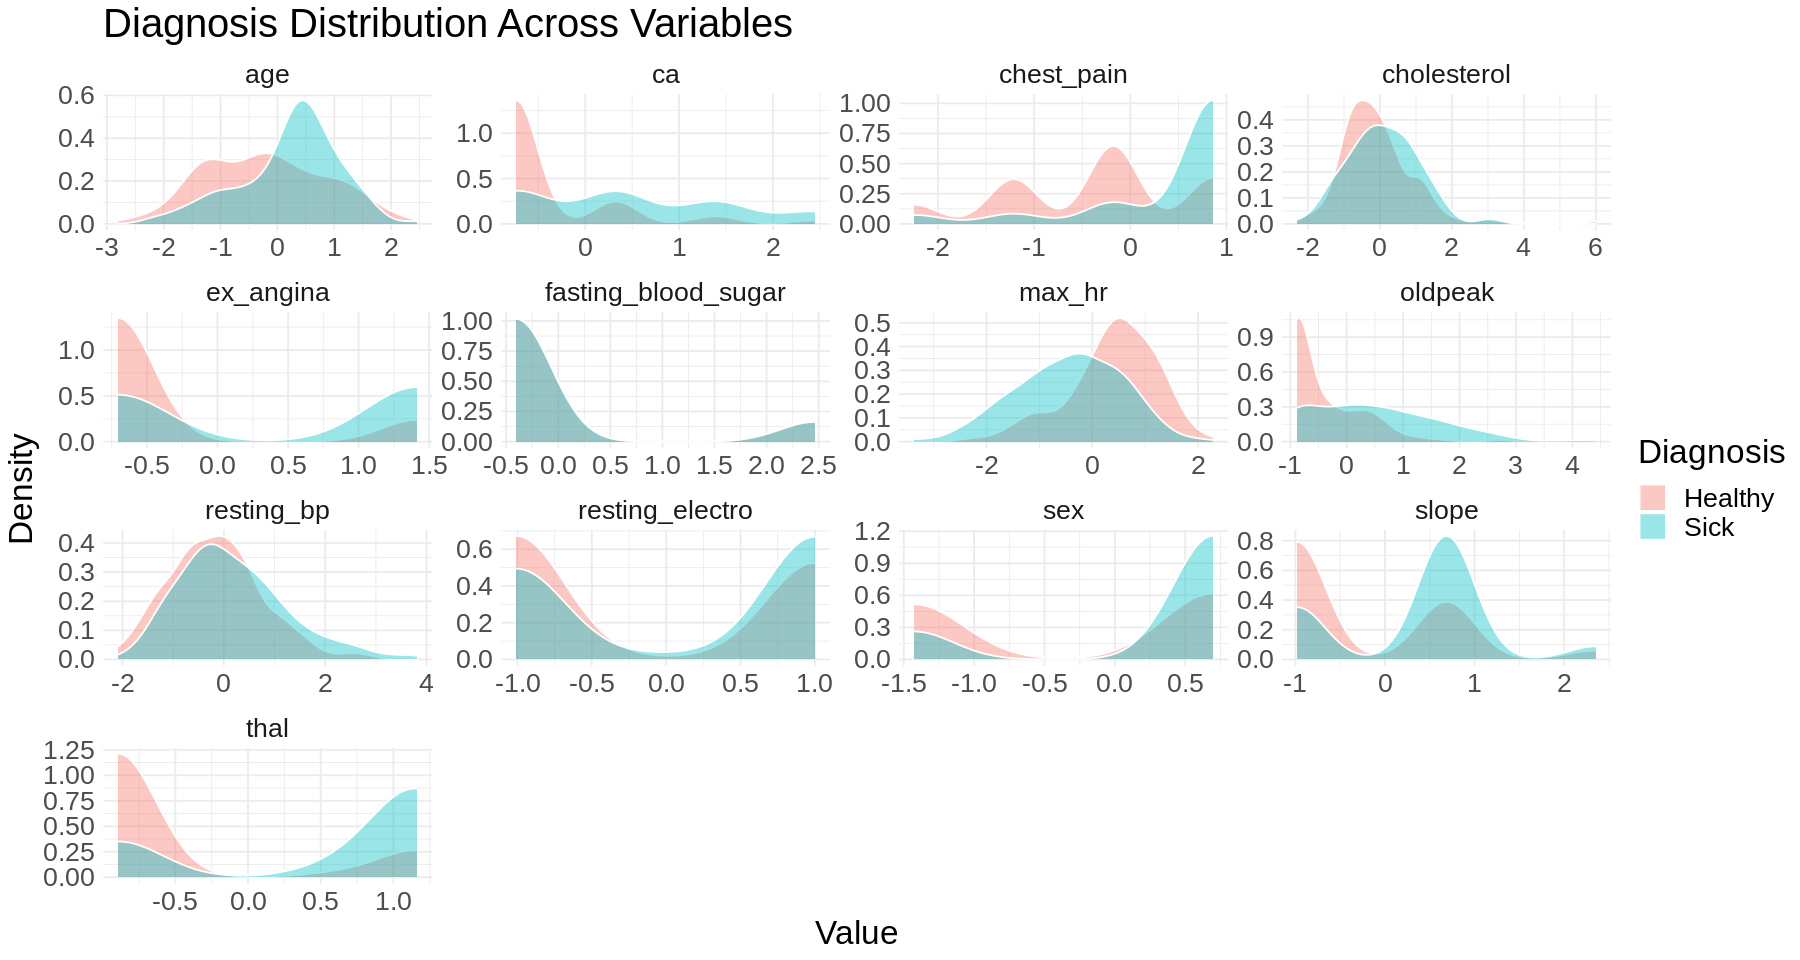

In [7]:
options(repr.plot.height = 8, repr.plot.width = 15)
heart_data_scaled|>
    pivot_longer(cols = -num, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = num)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        labs(fill = "Diagnosis", x = "Value", y = "Density")+
        ggtitle("Diagnosis Distribution Across Variables")+
        theme(text = element_text(size = 20))

#### Figure 1.0: Diagnosis Distribution Across Variables

In order to better identify the correlation between the variables in the data set and the diagnosis that was given we plotted each variable against the density of the points observed and color coded the regions that indicate healthy and sick. This showed us where most of the points lie, and therefore which ones are best to be used in our classifier. The less overlap, the better the variable will be in classifying the new observation. 

In [8]:
heart_clean <- heart_data_scaled |>
select("age", "sex", "oldpeak", "chest_pain", "max_hr", "thal", "ex_angina", "ca", "num")
heart_clean

age,sex,oldpeak,chest_pain,max_hr,thal,ex_angina,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.034985,0.6981985,0.65826822,-2.248337,-0.2187793,-0.8929336,1.415489,-0.7358115,Healthy
0.377437,-1.4270869,-0.02561475,-2.248337,0.5581676,-0.8929336,-0.703919,-0.7358115,Healthy
0.377437,0.6981985,0.65826822,-1.212082,0.4718402,-0.8929336,-0.703919,-0.7358115,Sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.4733496,0.6981985,2.0260342,0.8604283,-0.3482704,1.1639696,-0.703919,1.3873112,Sick
0.2678458,0.6981985,0.1453560,0.8604283,-1.4705270,1.1639696,1.415489,0.3257499,Sick
0.2678458,-1.4270869,-0.8804685,-1.2120816,1.0761322,-0.8929336,-0.703919,0.3257499,Sick


#### Table 1.4: Selected Variables

Here we selected the variables from the data set that we decided to use for our classification. As we mentioned earlier, the variables were chosen based on which ones had the least overlap graphically, but from the ones that we chose this isn't completely true. This is because when choosing the ones with the least overlap, the classifier was doing a much better job at predicting healthy rather than sick individuals. Due to this we wanted to add predictor variables that not only showed less overlap, but also had more space taken up graphically by sick individuals, strengthening our classifier in predicting sick individuals. This is evident with sex, while there is quite a bit of overlap, most of the graph is dedicated to sick individuals, influencing our classifier. This also illuminated that many of the variables are confounding which we talk about more in our summary. 

In [9]:
heart_disease_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

This is where we split our scaled and centered data into a training and test set, this makes it so that we can train our classifier but also test it without necessarily having a completely new data set.

In [10]:
heart_disease_table <- heart_disease_train |>
group_by(num)|>
summarize(chest_pain = mean(chest_pain, na.rm = TRUE),
    thal = mean(thal, na.rm = TRUE),
    ex_angina = mean(ex_angina, na.rm = TRUE),
    oldpeak = mean(oldpeak, na.rm = TRUE),
    sex = mean(sex, na.rm = TRUE),
    ca = mean(ca, na.rm = TRUE),
    age = mean(age, na.rm = TRUE),
    max_hr = mean(max_hr, na.rm = TRUE))
heart_disease_table

num,chest_pain,thal,ex_angina,oldpeak,sex,ca,age,max_hr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Healthy,-0.3453957,-0.5096016,-0.4341761,-0.3823219,-0.3064819,-0.4559453,-0.1944301,0.4118034
Sick,0.4117406,0.4960062,0.4104091,0.4079812,0.3257258,0.5227406,0.1864997,-0.4786515


#### Table 1.5: Mean Values of Selected Variables

While this wasn't necessary for the classification itself, we summarized the mean of all of our chosen variables so see if there were any evident patterns, or things that stuck out to use that might assist in how we build our classifier, one thing being that most of the means for a healthy individual lie in the negative region, something we made note of.  

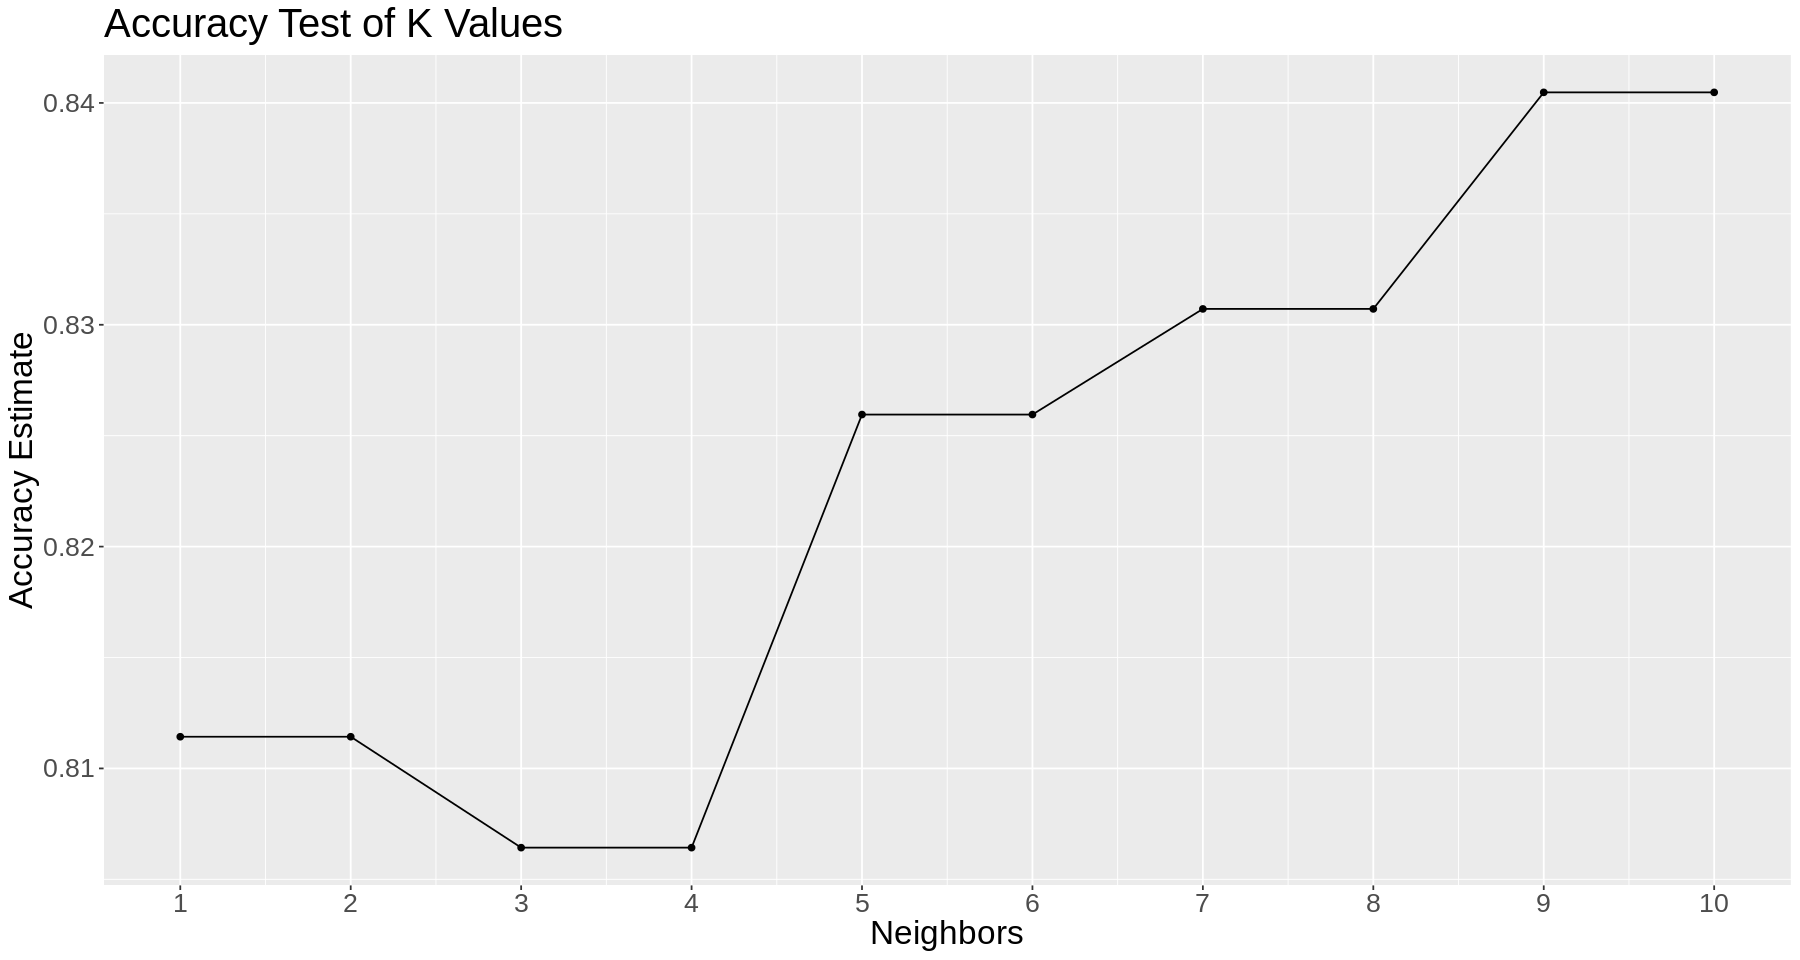

In [11]:
set.seed(2019) 

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

training_recipe <- recipe(num ~ ., data = heart_disease_train)

training_vfold <- vfold_cv(heart_disease_train, v = 10, strata = num)

grid_frame <- tibble(neighbors = (c(1,2,3,4,5,6,7,8,9,10)))

knn_results <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = training_vfold, grid = grid_frame) |>
    collect_metrics()

accuracies <- knn_results |> 
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 10, by = 1))+
    ggtitle("Accuracy Test of K Values")+
    theme(text = element_text(size = 20))
cross_val_plot

#### Figure 1.1: Accuracy Test of Various K Values 

Here is where we train our classifier. We set the seed here so that it returns the same set of random numbers each time. Since this is a classification we are using k-nearest classification, and setting our neighbors to tune in order to find the best k value for our classifier. We then did a cross-fold validation in order to test our classifier against itself. We created a data frame of arbitrary k values and then tested it using the parameters that we created above. The results were then graphed, giving the above plot. The higher the accuracy estimate on the plot, the better the k value, here we can see that 9 is the best k value as it maximizes accuracy while minimizing the number of neighbors. 

In [20]:
set.seed(2019) 

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(heart_spec) |>
    fit(data = heart_disease_train)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1835749
Best kernel: rectangular
Best k: 9

Using the chosen k from above, an new classification specification was created, it was then added to a fit so create the parameters that will be used in our classifier

In [21]:
set.seed(2019) 

heart_predictions <- predict(heart_fit , heart_disease_test) |>
    bind_cols(heart_disease_test)
heart_predictions

.pred_class,age,sex,oldpeak,chest_pain,max_hr,thal,ex_angina,ca,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Sick,0.5966196,0.6981985,1.1711804,0.8604283,-0.7367438,1.1639696,1.415489,1.3873112,Sick
Healthy,1.2541671,-1.4270869,1.3421512,-2.2483366,-1.5136907,-0.8929336,-0.703919,-0.7358115,Healthy
Sick,0.2678458,0.6981985,-0.3675562,0.8604283,-1.6000181,0.6497438,1.415489,0.3257499,Sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Healthy,1.3637584,0.6981985,-0.1965855,-0.1758267,0.04020303,1.1639696,-0.703919,-0.7358115,Sick
Sick,0.9253933,-1.4270869,-0.8804685,0.8604283,-0.56408898,-0.8929336,1.415489,-0.7358115,Sick
Healthy,-1.4856143,0.6981985,-0.8804685,-1.2120816,1.42144190,-0.8929336,-0.703919,-0.7358115,Healthy


#### Table 1.6: Predicted Class for Test Set

In [22]:
set.seed(2019) 

heart_metrics <- heart_predictions |>
    metrics(truth = num, estimate = .pred_class)             
heart_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8285714
kap,binary,0.6537510


#### Table 1.7: Accuracy Metrics for Classifier

In [23]:
set.seed(2019)

heart_conf_mat <- heart_predictions |> 
    conf_mat(truth = num, estimate = .pred_class)
heart_conf_mat

          Truth
Prediction Healthy Sick
   Healthy      33    8
   Sick          4   25

#### Table 1.8: Confusion Matrix for Classifier

Here is where the actual prediction occurs, the test set was run with the classifier we created above. We then collected the metrics of accuracy of our classifier showing that it is about 83% accurate. From here we created a confusion matrix which displays the amount of predictions that were accurate and which were false more clearly.

In [16]:
heart_proportions <- heart_disease_train |>
group_by(num) |>
summarize(n = n()) |>
mutate(percent = 100*n/nrow(heart_disease_train))
heart_proportions

num,n,percent
<fct>,<int>,<dbl>
Healthy,110,53.1401
Sick,97,46.8599


#### Table 1.9: Percentage of Each Class within Training Data Set

In order to decide whether this amount of accuracy was appropriate we compared it to the majority classifier. This shows us that if the classifier were to make all of its predictions just based on the majority of points it would return 53% accuracy every time. This makes our classifier significantly better than the majority. Despite this, we are predicting the presence and absence of heart disease, so while this percentage is fairly high for accuracy, it can always be improved. 

In [24]:
conf <- structure(c(33, 4, 8, 25, 0.89189189, 0.75757576
), .Dim = 2:3, .Dimnames = list(c("Healthy_p", "Sick_p"), c("Healthy", 
"Sick", "class.error")))
conf

,Healthy,Sick,class.error
Healthy_p,33,8,0.8918919
Sick_p,4,25,0.7575758


#### Table 2.0: Reformatted Confusion Matrix 

Here we reformatted our confusion matrix in order to make visualization of our results easier. This has to be done manually for each time the classifier is run. 

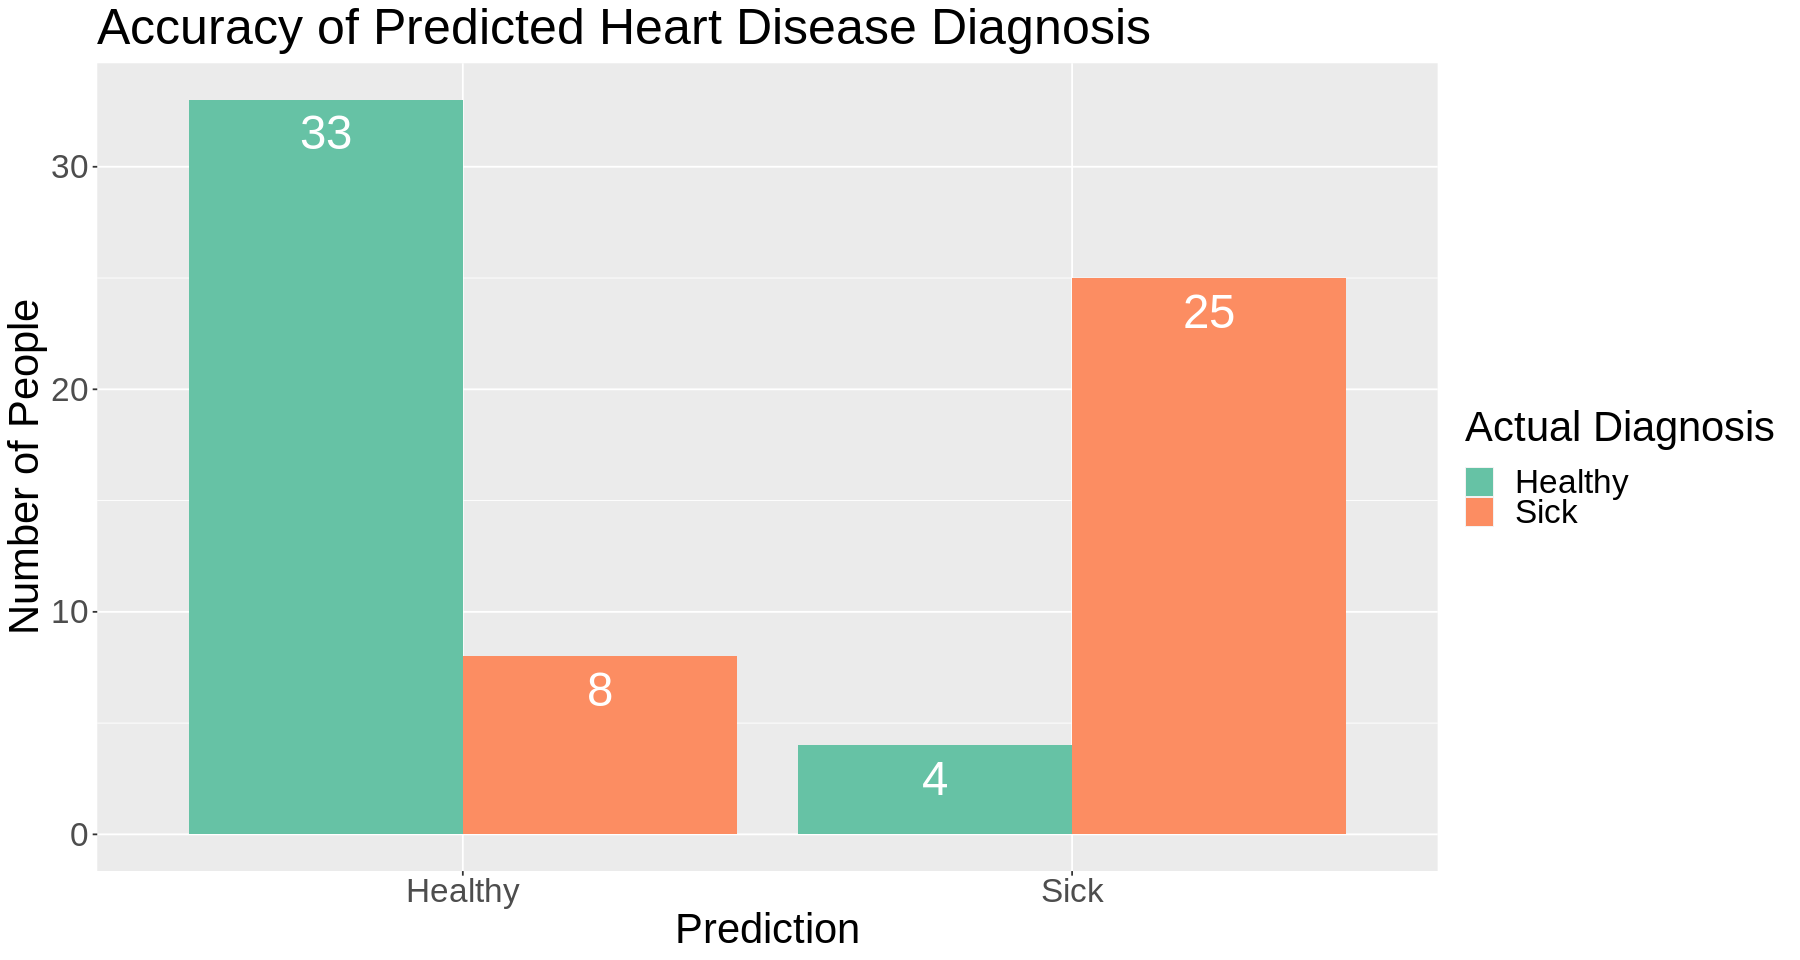

In [25]:
conf_plot <- conf|> 
as.data.frame(conf) |>
select(-class.error)|>
tibble::rownames_to_column("Prediction")|>
mutate(Prediction = case_when(Prediction == 1 ~ "Healthy" , Prediction == 2 ~ "Sick"))|>
pivot_longer(-Prediction, names_to = "Diagnosis")|>
ggplot((aes(x=Prediction,y=value,fill=Diagnosis))) + geom_bar(stat = "identity", position = "dodge") +
ylab("Number of People") +
xlab("Prediction") +
labs(fill = "Actual Diagnosis") +
ggtitle("Accuracy of Predicted Heart Disease Diagnosis") +
scale_fill_brewer(palette = "Set2") +
geom_text(aes(label = value), colour = "white", size = 10, vjust = 1.5, position = position_dodge(.9)) + 
theme(text = element_text(size = 25))
print(conf_plot)

#### Figure 1.2: Visualization of Classifier Accuracy

We took the confusion matrix that we reformatted from above and converted it to a data frame, we then removed the class error column, wrangled the data to make it more appropriate for the visualization, and then organized it graphically to make the above visualization of our results. As you can see the predictions of healthy and sick where the individuals were actually healthy and sick respectively far out number the number of individuals who were misdiagnosed by our classifier. 

### Summary of Our Findings 

In summary, we found that our classifier was fairly good at predicting the heart disease status of an individual, but there are many confounding variables as creating such a classifier is not straightforward. The variables we chose were based on the amount of graphical overlap between healthy and sick individuals; despite this, we needed to choose variables that had more influence over sick individuals to balance the predictions as they leaned more towards the healthy. Fixing one issue can cause more misattributions for the healthy diagnosis, however, demonstrating that variables are more complicated than initially assumed. What we found was expected. If it was simple to create a classifier for diseases, it would have already been the route for illness diagnosis. Seeing that we got around 81% accuracy from our classifier is better than what was expected. The predictions vary based on how many sick/healthy individuals it accurately predicts which is something we expected to see. Although we can get a reading between 75% and 89%, the inconsistency seen with the above classifier is worrying for practical uses, again illuminating the variables as being highly indistinguishable in whether they indicate the presence or absence of heart disease. 

### What We Expected to Find

This contradicts what we initially expected. Instead of there being a defined line between what indicates the presence or absence of heart disease, there is far more overlap. Understanding that these variables are confounding has relevant impacts. The correlations not being as clear as we first predicted makes it harder to find what individuals should alter in their lives to lessen the likelihood of developing heart disease. It could cause individuals to be more proactive and strive for healthier lives, possibly decreasing their likelihood of developing heart disease despite the variables being unclear. Therefore, it will not only lead to more research being dedicated to understanding the extent of the influence of these variables, but also what preventative measures one can take prior to development.   

### Future Questions From Our Findings

With the current understanding we have and the classifier that we created, we suspect that questions will arise regarding how predictive classifiers can be used as a way to give people an idea of their likelihood of developing this disease. This might not provide an entire diagnosis, but likely a preliminary measure to a doctor's diagnosis so individuals who are clearly healthy can avoid having to make a doctor's visit, while those that are clearly sick can get the care they need. We believe that despite the confounding variables we found, questions will be raised about how impactful their daily lifestyle choices are to their overall health. Classifiers can help raise questions about what really contributes to the development of heart disease and other similar diseases, and how someone can continue to take better care of themselves even with a predisposition or diagnosis.

### References

Centers for Disease Control and Prevention. (2023, March 21). About heart disease. Centers for Disease Control and Prevention. Retrieved April 12, 2023, from https://www.cdc.gov/heartdisease/about.htm#:~:text=What%20is%20heart%20disease%3F,can%20cause%20a%20heart%20attack. 

Lay out panels in a grid - facet_grid. - facet_grid • ggplot2. (n.d.). Retrieved April 8, 2023, from https://ggplot2.tidyverse.org/reference/facet_grid.html 

Markdown for Jupyter notebooks cheatsheet. Markdown for jupyter notebooks cheatsheet. (n.d.). Retrieved April 12, 2023, from https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet 

Plot confusion matrix as stacked bar chart with GGPLOT2. Stack Overflow. (1966, November 1). Retrieved April 8, 2023, from https://stackoverflow.com/questions/59714182/plot-confusion-matrix-as-stacked-bar-chart-with-ggplot2 

Tiffany Timbers, T. C. (2022, September 24). Data science. Chapter 6 Classification II: evaluation &amp; tuning. Retrieved April 11, 2023, from https://datasciencebook.ca/classification2.html 

Types of heart disease. Heart and Stroke Foundation of Canada. (n.d.). Retrieved April 12, 2023, from https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease 

UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved April 8, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 